# Brain Tumor

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import io

from google.colab import files

#TensorFlow utils
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import Dense, Activation

#Evaluating and Modelling
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support

## Upload Dataset

In [ ]:
# load dataset
#from google.colab import drive

#drive.mount('/drive')
#data = pd.read_csv('/drive/My Drive/Colab Notebooks/LungCancerDataset.csv')

In [2]:
#load dataset
datasets = files.upload()

Saving risk_of_brain_tumor.csv to risk_of_brain_tumor (2).csv


In [3]:
data = pd.read_csv(io.BytesIO(datasets['risk_of_brain_tumor.csv']))

data

,Unnamed: 0,Patient Id,Age,Gender,Genetic Risk,Occupational Hazards,Headache,Seizure Rate,Convulsion Rate,Blurred Vision,...,Balance Disorder,Nausea,Vomiting,Rate of Memory Lapses,Drowsiness,Personality disorder,Numbness in arms,Numbness in legs,Syncope Rate,C-Risk Level
0,0,P1,33,1,3,4,2,2,2,2,...,3,4,4,2,3,3,2,2,4,0
1,1,P240,35,1,2,4,2,2,6,2,...,2,4,3,1,4,2,4,2,4,0
2,2,P239,42,1,4,3,2,1,3,2,...,1,2,2,3,1,1,1,1,2,0
3,3,P10,17,1,4,3,8,7,2,7,...,2,3,1,1,1,2,2,6,2,0
4,4,P238,22,0,3,4,3,1,5,1,...,4,2,2,2,3,6,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,358,P32,27,1,2,3,4,2,3,2,...,1,1,1,3,3,1,2,2,3,0
359,359,P320,65,1,7,7,5,6,6,3,...,1,3,2,3,2,1,4,5,2,1
360,360,P321,38,0,2,3,5,2,3,3,...,1,4,4,3,6,1,3,2,3,1
361,361,P322,19,1,3,2,5,6,2,2,...,2,3,1,6,4,2,2,6,4,0


In [4]:
data.columns

Index(['Unnamed: 0', 'Patient Id', 'Age', 'Gender', 'Genetic Risk',
       'Occupational Hazards', 'Headache', 'Seizure Rate', 'Convulsion Rate',
       'Blurred Vision', 'Double Vision', 'Peripheral Vision Loss',
       'Loss of Smell', 'Balance Disorder', 'Nausea', 'Vomiting',
       'Rate of Memory Lapses', 'Drowsiness', 'Personality disorder',
       'Numbness in arms', 'Numbness in legs', 'Syncope Rate', 'C-Risk Level'],
      dtype='object')

**Columns Description:**
1. Unnamed: 0
2. Patient Id
3. Age
4. Gender
5. Genetic Risk
6. Occupational Hazards
7. Headache
8. Seizure Rate
9. Convulsion Rate
10. Blurred Vision
11. Double Vision
12. Peripheral Vision Loss
13. Loss of Smell
14. Balance Disorder
15. Nausea
16. Vomiting
17. Rate of Memory Lapses
18. Drowsiness
19. Personality disorder
20. Numbness in arms
21. Numbness in legs
22. Syncope Rate
23. C-Risk Level (**target**)

note:

**0 - No || 1 - Yes**


## Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 363 entries, 0 to 362
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              363 non-null    int64 
 1   Patient Id              363 non-null    object
 2   Age                     363 non-null    int64 
 3   Gender                  363 non-null    int64 
 4   Genetic Risk            363 non-null    int64 
 5   Occupational Hazards    363 non-null    int64 
 6   Headache                363 non-null    int64 
 7   Seizure Rate            363 non-null    int64 
 8   Convulsion Rate         363 non-null    int64 
 9   Blurred Vision          363 non-null    int64 
 10  Double Vision           363 non-null    int64 
 11  Peripheral Vision Loss  363 non-null    int64 
 12  Loss of Smell           363 non-null    int64 
 13  Balance Disorder        363 non-null    int64 
 14  Nausea                  363 non-null    int64 
 15  Vomiti

In [6]:
data.isnull().sum()

Unnamed: 0                0
Patient Id                0
Age                       0
Gender                    0
Genetic Risk              0
Occupational Hazards      0
Headache                  0
Seizure Rate              0
Convulsion Rate           0
Blurred Vision            0
Double Vision             0
Peripheral Vision Loss    0
Loss of Smell             0
Balance Disorder          0
Nausea                    0
Vomiting                  0
Rate of Memory Lapses     0
Drowsiness                0
Personality disorder      0
Numbness in arms          0
Numbness in legs          0
Syncope Rate              0
C-Risk Level              0
dtype: int64

<Axes: >

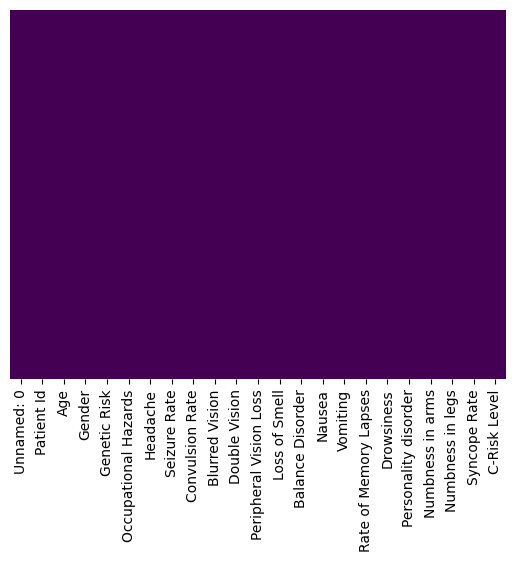

In [7]:
sns.heatmap(data.isna(), yticklabels=False, cbar=False, cmap='viridis')

**Drop Duplicate Data**, if exiest (*optional*)

In [8]:
len(data)

363

In [9]:
data = data.drop(['Unnamed: 0', 'Patient Id'], axis=1)

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
len(data)

249

**###**

In [12]:
data

,Age,Gender,Genetic Risk,Occupational Hazards,Headache,Seizure Rate,Convulsion Rate,Blurred Vision,Double Vision,Peripheral Vision Loss,...,Balance Disorder,Nausea,Vomiting,Rate of Memory Lapses,Drowsiness,Personality disorder,Numbness in arms,Numbness in legs,Syncope Rate,C-Risk Level
0,33,1,3,4,2,2,2,2,2,2,...,3,4,4,2,3,3,2,2,4,0
1,35,1,2,4,2,2,6,2,2,2,...,2,4,3,1,4,2,4,2,4,0
2,42,1,4,3,2,1,3,2,2,2,...,1,2,2,3,1,1,1,1,2,0
3,17,1,4,3,8,7,2,7,8,8,...,2,3,1,1,1,2,2,6,2,0
4,22,0,3,4,3,1,5,1,1,1,...,4,2,2,2,3,6,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,27,1,2,3,4,2,3,2,3,2,...,1,1,1,3,3,1,2,2,3,0
359,65,1,7,7,5,6,6,3,3,4,...,1,3,2,3,2,1,4,5,2,1
360,38,0,2,3,5,2,3,3,4,3,...,1,4,4,3,6,1,3,2,3,1
361,19,1,3,2,5,6,2,2,4,4,...,2,3,1,6,4,2,2,6,4,0


**Data Outline**

In [13]:
data_risk = data['C-Risk Level'].value_counts()

# Access the count of 'Yes' and 'No'
risk_y = data_risk[1]
risk_n = data_risk[0]

print("Count of 'Yes':", risk_y)
print("Count of 'No':", risk_n)

Count of 'Yes': 183
Count of 'No': 66


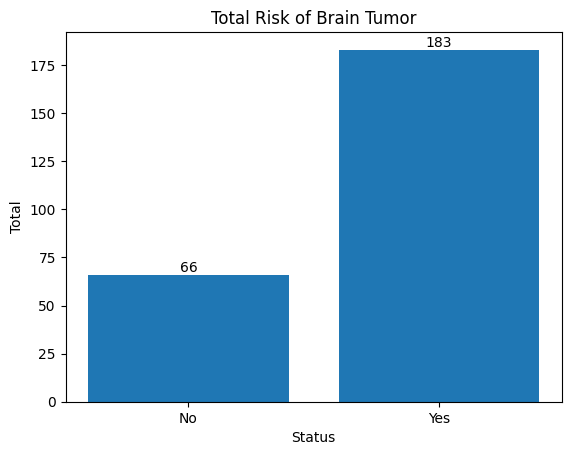

In [14]:
# Create a bar plot
plt.bar(['No', 'Yes'], [risk_n, risk_y])
plt.xlabel('Status')
plt.ylabel('Total')
plt.title('Total Risk of Brain Tumor')

# Add value labels on top of each bar
plt.text(0, risk_n, str(risk_n), ha='center', va='bottom')
plt.text(1, risk_y, str(risk_y), ha='center', va='bottom')

# Display the plot
plt.show()

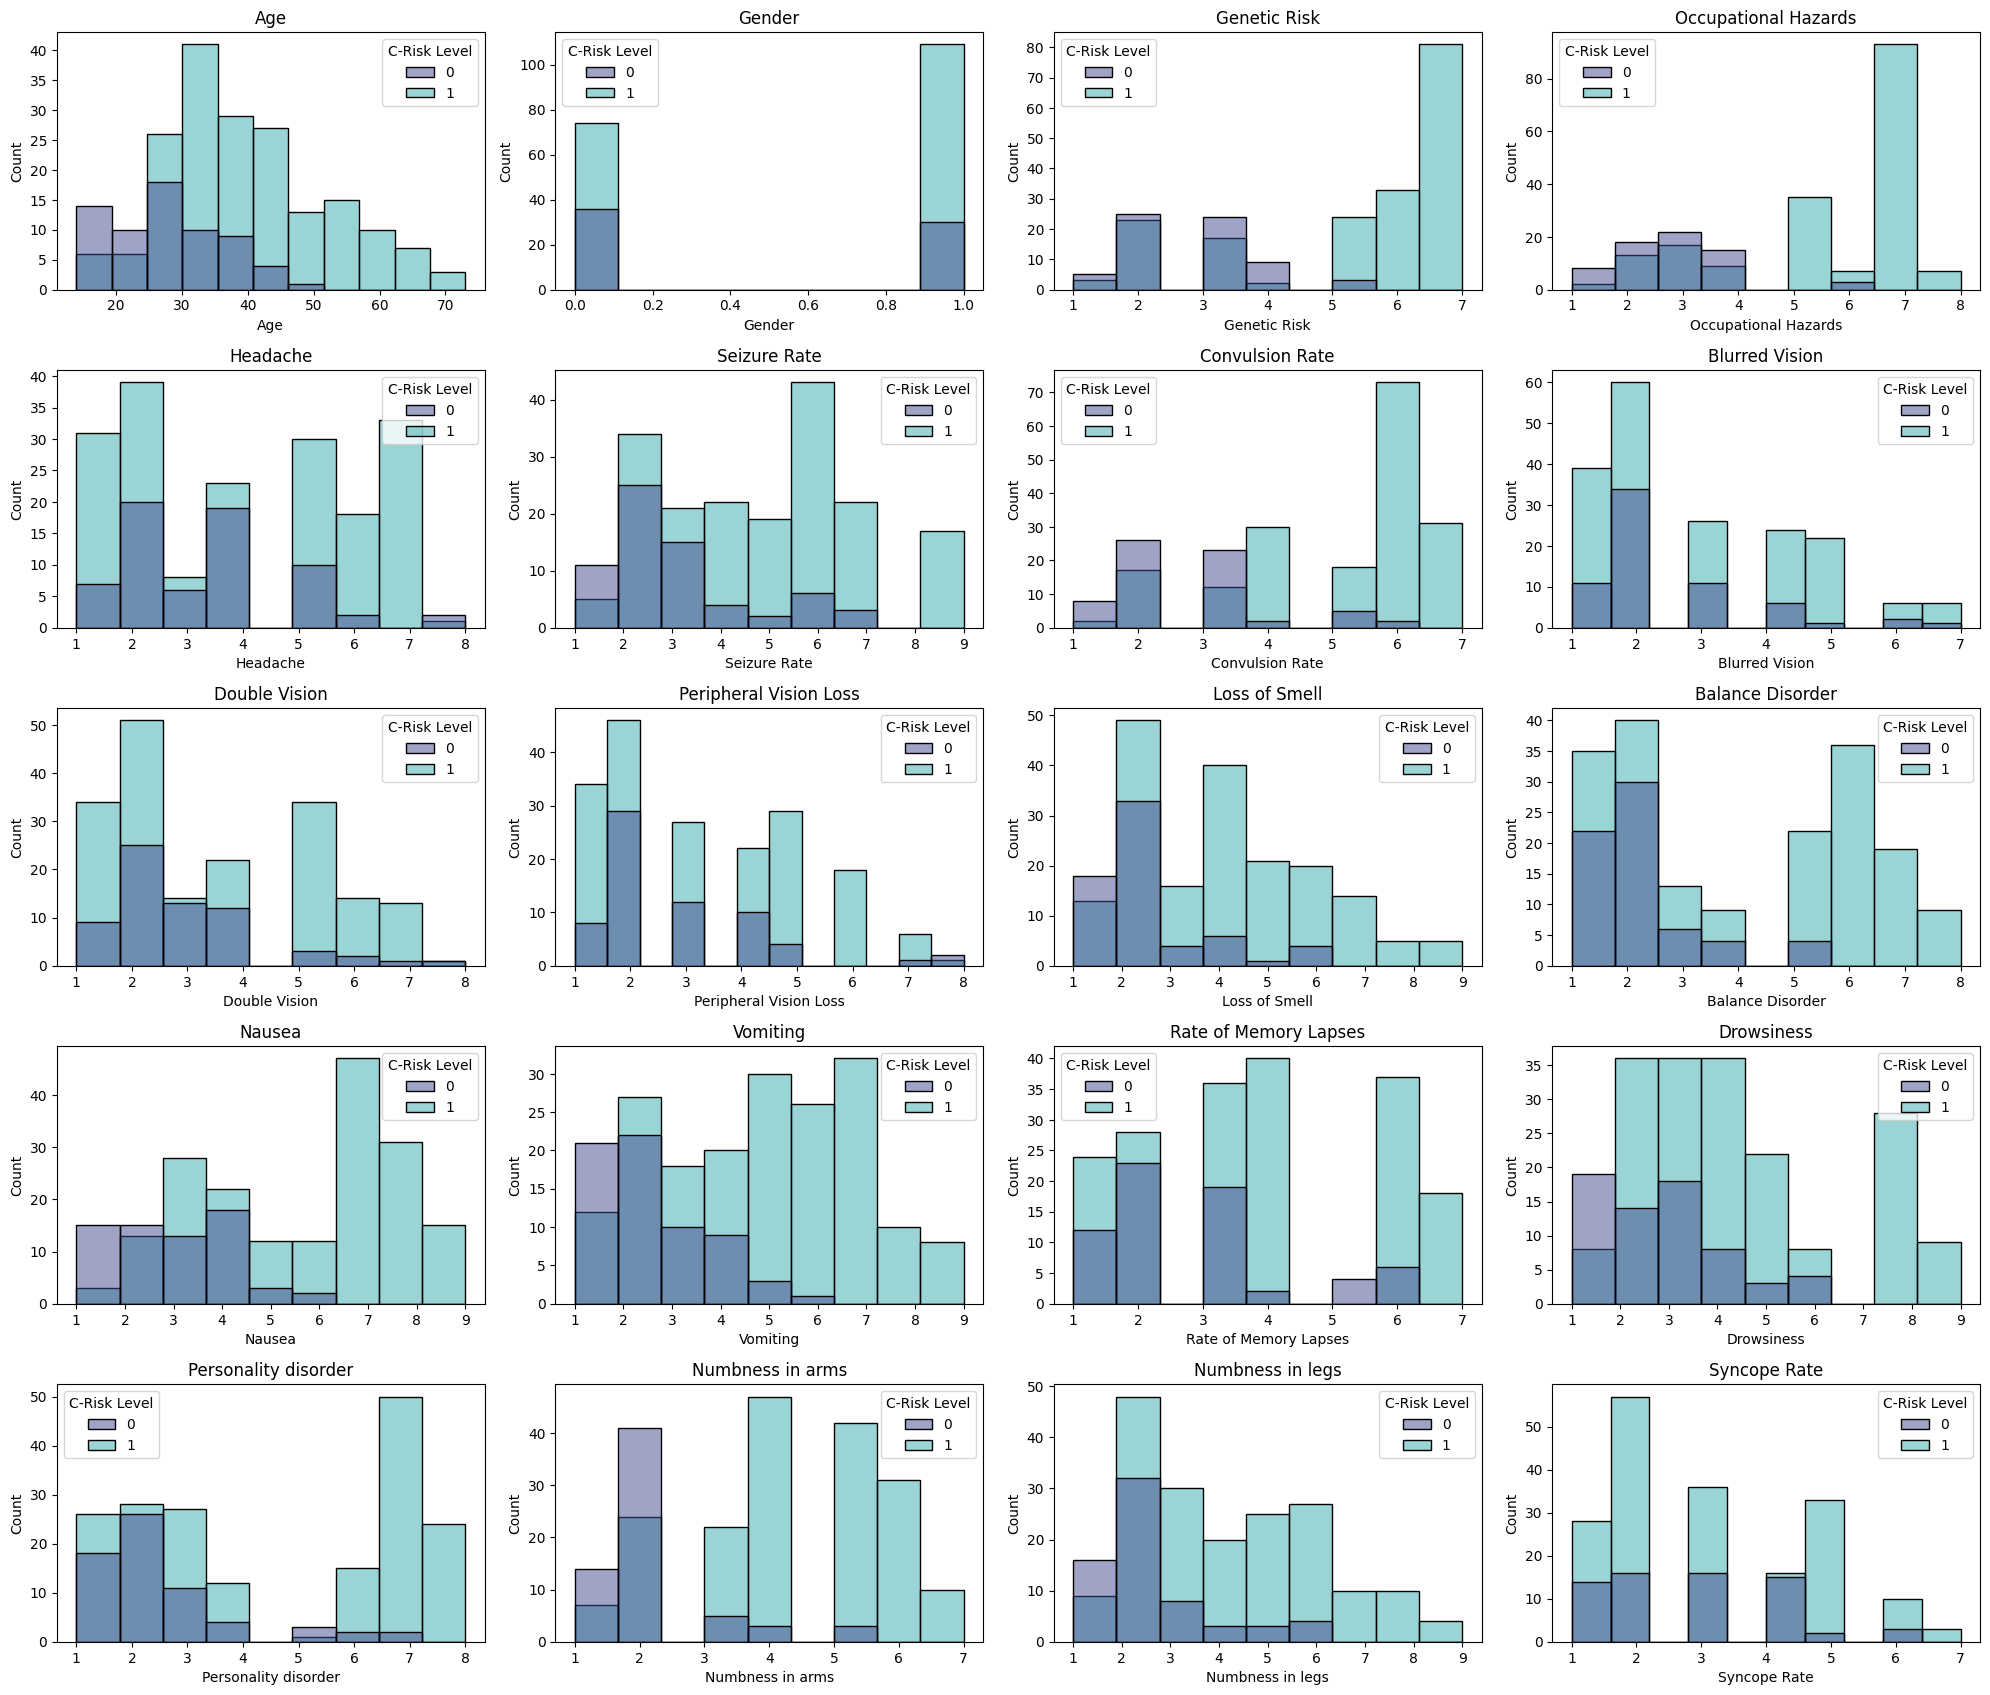

In [15]:
list_column = ['Age', 'Gender', 'Genetic Risk', 'Occupational Hazards', 'Headache',
       'Seizure Rate', 'Convulsion Rate', 'Blurred Vision', 'Double Vision', 'Peripheral Vision Loss',
       'Loss of Smell', 'Balance Disorder', 'Nausea', 'Vomiting', 'Rate of Memory Lapses', 'Drowsiness',
       'Personality disorder', 'Numbness in arms', 'Numbness in legs', 'Syncope Rate']

fig = plt.figure(figsize=(20,20))

for i in range(len(list_column)): #20
    plt.subplot(6, 4, i+1)
    plt.title(list_column[i])
    sns.histplot(data = data, x = data[list_column[i]], hue='C-Risk Level', palette='mako')

plt.tight_layout()

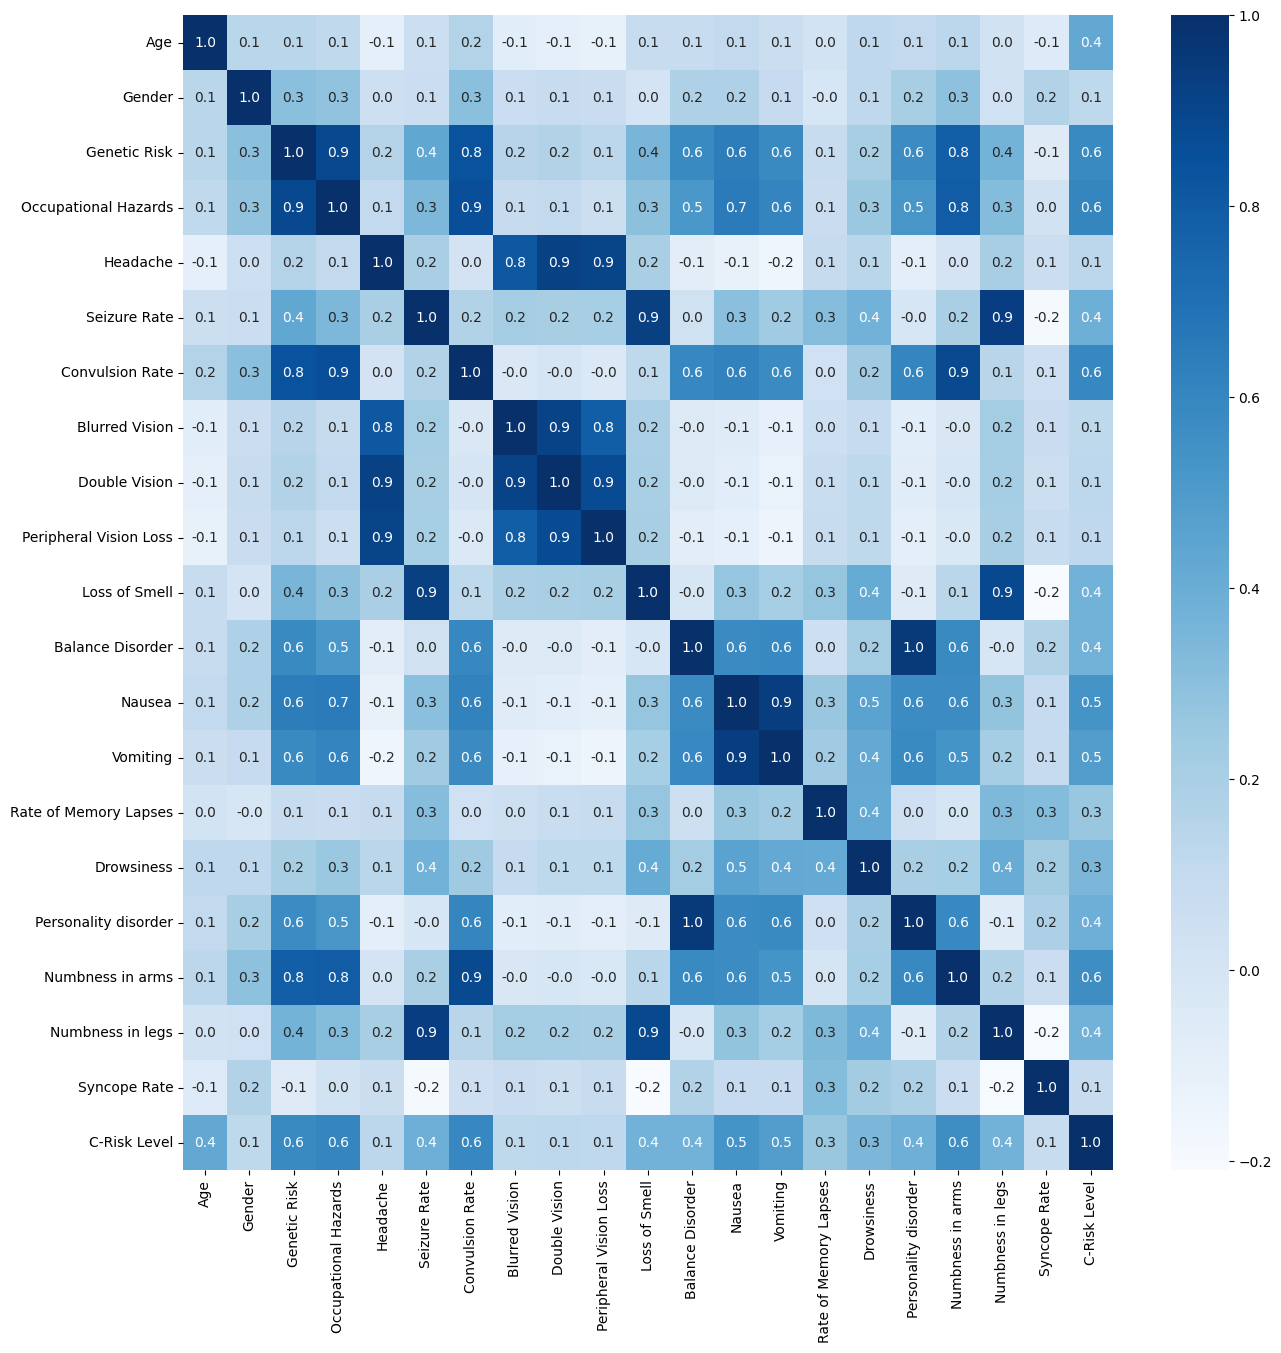

In [16]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot=True, cbar=True, cmap='Blues', fmt='.1f');

Correlation among features are:
* 'Headchace' with 'Blurred Vision': 0.8
* 'Headchace' with 'Double Vision', and 'Peripheral Vision Loss': 0.9
* 'Nausea' with 'Vomitting': 0.9
* 'Personality Dissorder' with 'Balance Dissorder': 0.9
* 'Convulstion Rate' with 'Numbness in Arms': 0.9
<br><br>

Correlation with 'Risk Level' are
* 'Age', 'Balance Disorder', 'Personality Disorder': 0.5
* 'Genetic Risk', 'Convulsion Rate', 'Nausea', 'Vomitting', 'Numbness in arms': 0.6
* 'Occupational Hazzards': 0.7

And also, our feature or columns have **positive correlation**. Characterized by the same positive value (1.0) diagonally

**List the heatmap of top 15 correlation (C-Risk Level)**

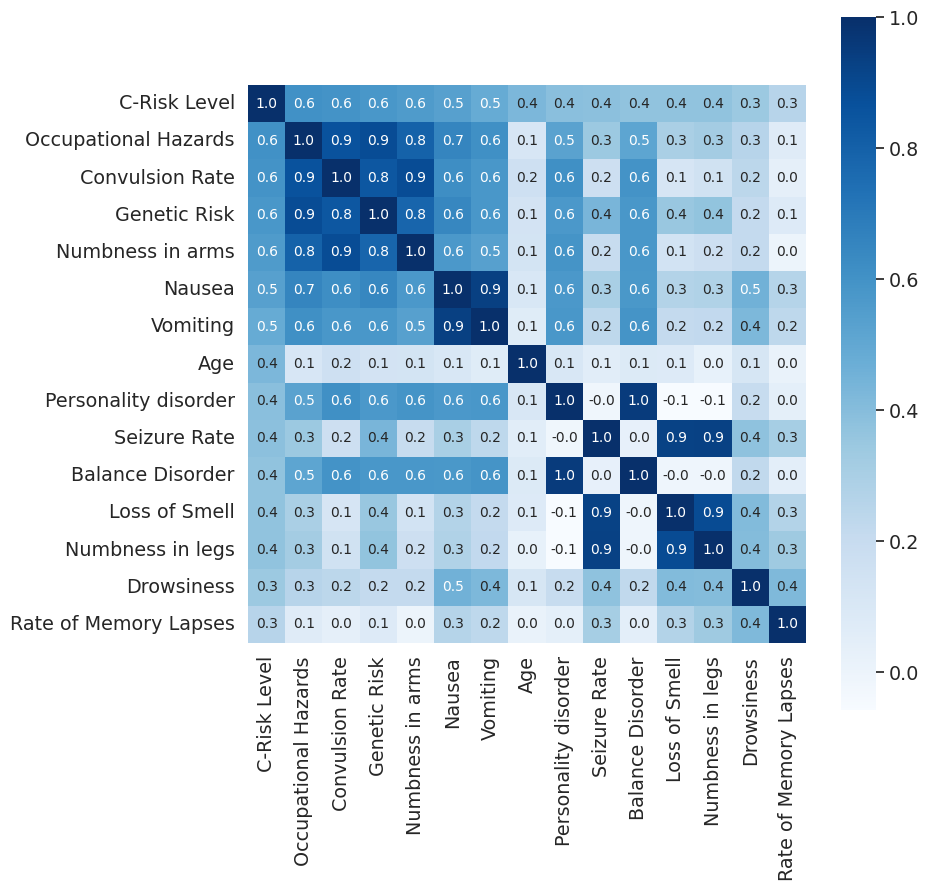

In [17]:
k = 15 #number of variables for heatmap
corrmat = data.corr()
cols = corrmat.nlargest(k, 'C-Risk Level')['C-Risk Level'].index
cm = np.corrcoef(data[cols].values.T)

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='Blues', fmt='.1f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

**List the heatmap of top 10 correlation (C-Risk Level)**

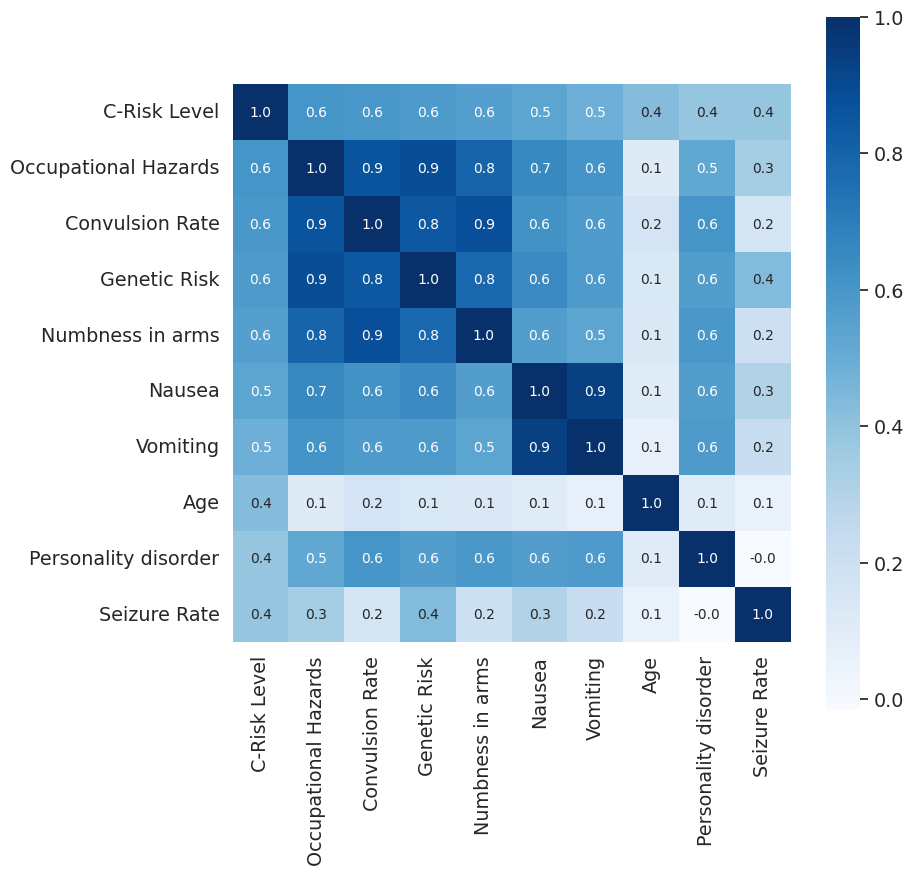

In [18]:
k = 10 #number of variables for heatmap
corrmat = data.corr()
cols = corrmat.nlargest(k, 'C-Risk Level')['C-Risk Level'].index
cm = np.corrcoef(data[cols].values.T)

plt.figure(figsize=(9,9))

sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, cmap='Blues', fmt='.1f', annot_kws={'size': 10},
                 yticklabels = cols.values, xticklabels = cols.values)
plt.show()

## Modeling

We will try to divide the data to ***train-test-validation***.

In [19]:
X = data.drop(['C-Risk Level'], axis=1)
y = data['C-Risk Level']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #Train - Test
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state = 42) #Train - validation

print(f'Train shape : {X_train.shape}\nTest shape: {X_test.shape}\nValidation shape: {X_val.shape}')

Train shape : (149, 20)
Test shape: (50, 20)
Validation shape: (50, 20)


**Balancing**

**Random Over Sampling**

In [ ]:
#from imblearn.over_sampling import RandomOverSampler
#X_train, y_train = RandomOverSampler().fit_resample(X_train, y_train)

**Random Under Sampling**

In [21]:
#from imblearn.under_sampling import RandomUnderSampler
#X_train, y_train = RandomUnderSampler().fit_resample(X_train, y_train)

**SMOTE**

In [44]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [36]:
X_train.shape

(214, 20)

In [37]:
sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

X_train['Age'] = sc.fit_transform(X_train[['Age']])
X_val['Age'] = sc.fit_transform(X_val[['Age']])
X_test['Age'] = sc.transform(X_test[['Age']])

X_train.head()

,Age,Gender,Genetic Risk,Occupational Hazards,Headache,Seizure Rate,Convulsion Rate,Blurred Vision,Double Vision,Peripheral Vision Loss,Loss of Smell,Balance Disorder,Nausea,Vomiting,Rate of Memory Lapses,Drowsiness,Personality disorder,Numbness in arms,Numbness in legs,Syncope Rate
0,-1.205957,1,7,7,7,5,6,5,5,7,5,5,7,7,3,9,7,4,3,4
1,-0.864249,0,2,4,2,4,3,2,2,2,2,2,4,2,4,1,2,2,2,1
2,-0.009980,1,3,4,2,2,2,2,2,2,2,1,4,4,2,3,3,2,2,4
3,-0.522541,1,7,7,7,6,6,5,7,7,5,7,7,7,2,2,7,4,5,1
4,0.502582,1,5,6,4,2,4,2,2,3,2,5,6,4,7,5,6,2,2,6


### Modeling and Find Best Parameter (*optional*)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, Dense, Dropout, LSTM
from keras.optimizers import Adam, RMSprop, SGD
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
#def create_model(hidden_unit = 6, dropout_rate = 0.2, optimizers = Adam, learning_rate = 0.001):
#def create_model():
#    model = Sequential()
#    model.add(Dense(9, activation = 'relu', kernel_initializer=initializer, input_shape=[20])),
#    model.add(Dense(9, activation = 'relu')),
#    model.add(Dense(3, activation = 'relu', kernel_initializer=initializer)),
#    model.add(Dense(1, activation = 'sigmoid', kernel_initializer=tf.keras.initializers.GlorotUniform(seed=0))),

#    model.compile(loss = 'binary_crossentropy', optimizer = optimizers(learning_rate = learning_rate), metrics = ['accuracy'])
#    model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    
#    print(model.summary())
    
#    return model

**Tuning Parameter**

In [ ]:
# # Wrapper model with default hyperparameter values
#model = KerasClassifier(build_fn = create_model, epochs = 10, batch_size=128) 

# # Hyperparameters
#embed_dim = [6, 16]
#hidden_unit = [6, 16]
#dropout_rate = [0.2]
#optimizers = [Adam, RMSprop]
#learning_rate = [0.01, 0.001, 0.0001]
#epochs = [10]
#batch_size = [10]

#param_grid = dict(embed_dim = embed_dim, hidden_unit = hidden_unit, learning_rate = learning_rate, 
#                  optimizers = optimizers, epochs = epochs, batch_size = batch_size)

# # Evaluation model with GridSearchCV to know what the best hyperparameter for model
#grid = GridSearchCV(estimator = model, param_grid = param_grid, cv = 5)
#grid_result = grid.fit(X_train_scaled, y_train)

#results = pd.DataFrame()
#results['means'] = grid_result.cv_results_['mean_test_score']
#results['stds'] = grid_result.cv_results_['std_test_score']
#results['params'] = grid_result.cv_results_['params']

#print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

### Modelling

In [45]:
from tensorflow.keras import initializers
initializer = tf.keras.initializers.HeNormal(seed=0)

model = Sequential(
    [
        Dense(5, activation = 'relu', input_shape=[20]),
        Dense(1, activation = 'sigmoid'),
    ]
)

model.build()

In [46]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 5)                 105       
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [47]:
X_train = np.asarray(X_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)

In [48]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, 
                    epochs=200, batch_size=16,
                    validation_data=(X_val, y_val), 
                    shuffle=True)

Epoch 1/200
14/14 [==============================] - 3s 33ms/step - loss: 2.0770 - accuracy: 0.5140 - val_loss: 0.8837 - val_accuracy: 0.8400
Epoch 2/200
14/14 [==============================] - 0s 9ms/step - loss: 1.5529 - accuracy: 0.5421 - val_loss: 0.8248 - val_accuracy: 0.7400
Epoch 3/200
14/14 [==============================] - 0s 14ms/step - loss: 1.2745 - accuracy: 0.4720 - val_loss: 0.9405 - val_accuracy: 0.6200
Epoch 4/200
14/14 [==============================] - 0s 12ms/step - loss: 1.1340 - accuracy: 0.4346 - val_loss: 1.0383 - val_accuracy: 0.5200
Epoch 5/200
14/14 [==============================] - 0s 10ms/step - loss: 1.0557 - accuracy: 0.4579 - val_loss: 1.0113 - val_accuracy: 0.4800
Epoch 6/200
14/14 [==============================] - 0s 9ms/step - loss: 0.9883 - accuracy: 0.4579 - val_loss: 0.9530 - val_accuracy: 0.5400
Epoch 7/200
14/14 [==============================] - 0s 25ms/step - loss: 0.9130 - accuracy: 0.4860 - val_loss: 0.8791 - val_accuracy: 0.6000
Epoch 8/

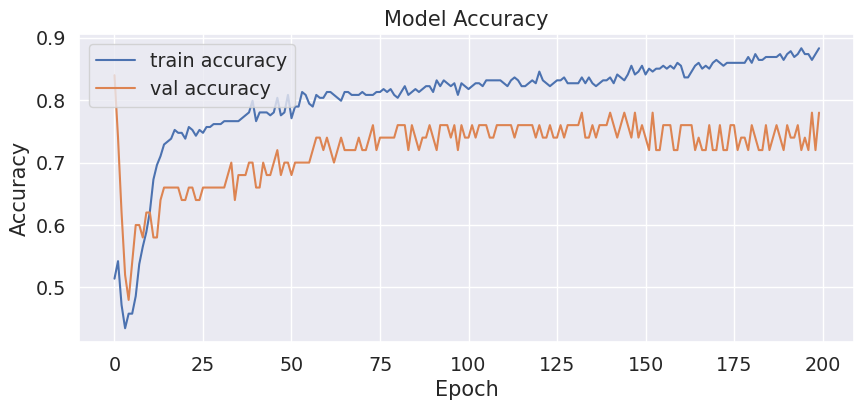

In [49]:
# Visualization model accuracy (train and val accuracy)
fig, ax = plt.subplots(figsize = (10, 4))
ax.plot(history.history['accuracy'], label = 'train accuracy')
ax.plot(history.history['val_accuracy'], label = 'val accuracy')
ax.set_title('Model Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylabel('Accuracy')
ax.legend(loc = 'upper left')

plt.show()

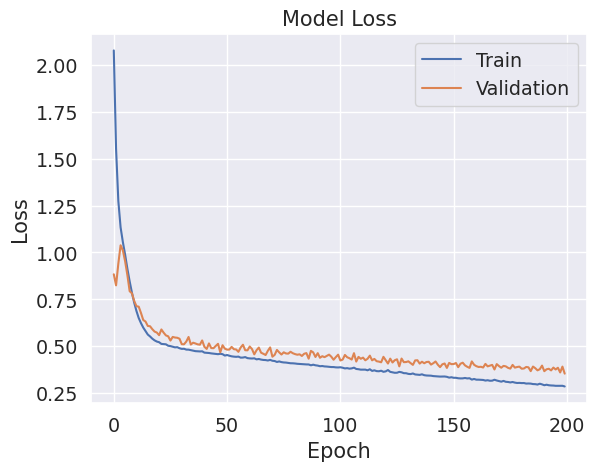

In [50]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Model Loss')
plt.legend(loc='upper right')

In [51]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

2/2 [==============================] - 0s 7ms/step - loss: 0.4113 - accuracy: 0.8400
Test loss: 0.4112608730792999
Test accuracy: 0.8399999737739563


2/2 [==============================] - 0s 6ms/step
Confusion Matrix


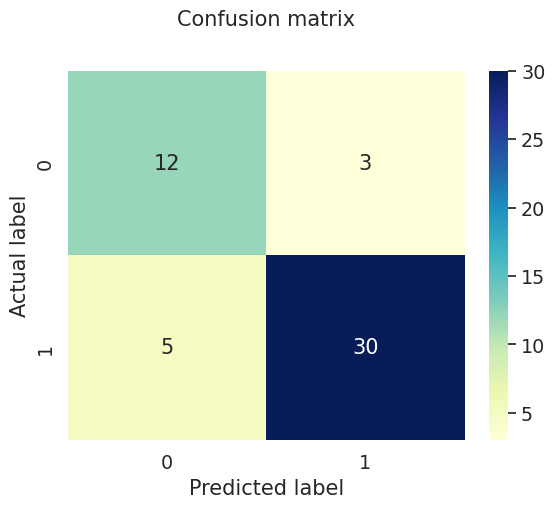

In [52]:
from sklearn.metrics import confusion_matrix

y_true = y_test
y_pred = model.predict(X_test)
cm = confusion_matrix(y_true.round(), y_pred.round())

print("Confusion Matrix")
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt="g")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label');

In [53]:
print(classification_report(y_true.round(),y_pred.round()))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75        15
           1       0.91      0.86      0.88        35

    accuracy                           0.84        50
   macro avg       0.81      0.83      0.82        50
weighted avg       0.85      0.84      0.84        50



For this '**Lung Cancer Detection**' cases. All of the report aspect is important, but for me `Recall` is one of the most important here. Because we don't want to have a worng prediction.
<br><br>
We got (Recall):<br>
**0 = 91%** <br>
**1 = 92%** <br>

So, it's quite good enough for our Model.




Note: <br>
**RandomOverSampling**
1. 9|3|1| 150 Epochs | lr=0.001 | 10 Batch = 84% | Recall = 87 | 83 
2. 9|3|1| 150 Epochs | lr=0.001 | 16 Batch = 86% | Recall = 87 | 83
3. 9|3|1| 150 Epochs | lr=0.001 | 16 Batch = 86% | Recall = 87 | 86 (no initializer) (v)
**SMOTE**
1. 9|3|1| 150 Epochs | lr=0.001 | 16 Batch = 86% | Recall = 87 | 86 (no initializer) (v)
2. 18|9|3|1| 150 Epochs | lr=0.001 | 16 Batch = 84% | Recall = 73 | 89 (no initializer)
3. 18|9|3|1| 150 Epochs | lr=0.0005 | 16 Batch = 86% | Recall = 100 | 80 (no initializer)
4. 5|1 200 Epochs | lr=0.001 | 10 Batch = 86% | Recall = 93 | 83 (v)
5. 5|1 200 Epochs | lr=0.001 | 16 Batch = 88% | Recall = 93 | 86 (v) 

## ML Model

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9354838709677419


### Decision Tree

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9516129032258065


## Save Model

In [54]:
!mkdir -p saved_model
model.save('saved_model/my_model')

In [55]:
model.save('brain_model.h5')

Download the model with **.pb** format. (for TFServing)

In [56]:
files.download('saved_model/my_model/variables/variables.data-00000-of-00001')
files.download('saved_model/my_model/variables/variables.index')
files.download('saved_model/my_model/fingerprint.pb')
files.download('saved_model/my_model/keras_metadata.pb')
files.download('saved_model/my_model/saved_model.pb')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [57]:
files.download('brain_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Test Model

In [58]:
new_model = tf.keras.models.load_model('saved_model/my_model')

In [59]:
loss, acc = new_model.evaluate(X_test, y_test)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

2/2 [==============================] - 0s 8ms/step - loss: 0.4113 - accuracy: 0.8400
Restored model, accuracy: 84.00%
